SVM has become one of the state-of-the-art machine learning models for many tasks
with excellent results in many practical applications. One of the greatest advantages
of SVM is that they are very effective when working on high-dimensional spaces,
that is, on problems which have a lot of features to learn from. They are also very
effective when the data is sparse (think about a high-dimensional space with very
few instances). Besides, they are very efficient in terms of memory storage, since only
a subset of the points in the learning space is used to represent the decision surfaces.

To mention some disadvantages, SVM models could be very calculation intensive
while training the model and they do not return a numerical indicator of how
confident they are about a prediction. However, we can use some techniques such as
K-fold cross-validation to avoid this, at the cost of increasing the computational cost.

We will apply SVM to image recognition, a classic problem with a very large
dimensional space (the value of each pixel of the image is considered as a feature).

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print (faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



The dataset contains 400 images of 40 different persons. The photos were taken
with different light conditions and facial expressions (including open/closed eyes,
smiling/not smiling, and with glasses/no glasses). For additional information about
the dataset refer to http://www.cl.cam.ac.uk/research/dtg/attarchive/
facedatabase.html.
Looking at the content of the faces object, we get the following properties: images,
data, and target. Images contain the 400 images represented as 64 x 64 pixel
matrices. data contains the same 400 images but as array of 4096 pixels. target is, as
expected, an array with the target classes, ranging from 0 to 39.

In [4]:
print (faces.keys())

dict_keys(['target', 'images', 'DESCR', 'data'])


In [5]:
print (faces.images.shape)

(400, 64, 64)


In [6]:
print (faces.data.shape)

(400, 4096)


In [7]:
print (faces.target.shape)

(400,)


Normalizing the data is important as we saw in the previous chapter. It is also
important for the application of SVM to obtain good results. In our particular case,
we can verify by running the following snippet that our images already come as
values in a very uniform range between 0 and 1 (pixel value):

In [10]:
print (np.max(faces.data))
print (np.min(faces.data))
print (np.mean(faces.data))

1.0
0.0
0.547043


In [86]:
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        # p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 8, str(target[i]), color='red', backgroundcolor = 'white')
        p.text(0, 60, str(i), color='red', backgroundcolor = 'white')

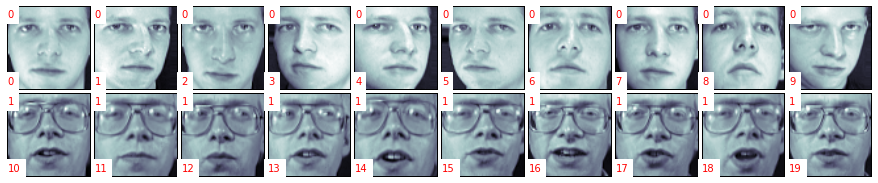

In [87]:
print_faces(faces.images, faces.target, 20)

In [29]:
# Training a Support Vector Machine
from sklearn.svm import SVC

The SVC implementation has different important parameters; probably the most
relevant is kernel, which defines the kernel function to be used in our classifier
(think of the kernel functions as different similarity measures between instances).
By default, the SVC class uses the rbf kernel, which allows us to model nonlinear
problems. To start, we will use the simplest kernel, the linear one.

In [30]:
svc_1 = SVC(kernel='linear')

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)

In [35]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))

In [36]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score: 0.913 (+/-0.012)


In [37]:
# We will also define a function to perform training on the training set and evaluate 
# the performance on the testing set.
from sklearn import metrics
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)

    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))

    y_pred = clf.predict(X_test)

    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [38]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19    

We try to classify the faces as people with and without glasses. 
First thing to do is to define the range of the images that show faces wearing glasses.
The following list shows the indexes of these images:

In [41]:
# the index ranges of images of people with glasses
glasses = [
    (10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
    (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
    (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
    (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
    (330, 339), (358, 359), (360, 369)
]

we'll define a function that from those segments returns a new target array that
marks with 1 for the faces with glasses and 0 for the faces without glasses (our new
target classes):

In [42]:
def create_target(segments):
    # create a new y array of target size initialized with zeros
    y = np.zeros(faces.target.shape[0])
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y
target_glasses = create_target(glasses)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    faces.data, target_glasses, test_size=0.25, random_state=0)

In [45]:
svc_2 = SVC(kernel='linear')

In [46]:
evaluate_cross_validation(svc_2, X_train, y_train, 5)

[ 1.          0.95        0.98333333  0.98333333  0.93333333]
Mean score: 0.970 (+/-0.012)


In [47]:
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        67
        1.0       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99       100

Confusion Matrix:
[[66  1]
 [ 0 33]]


Could it be possible that our classifier has learned to identify peoples' faces
associated with glasses and without glasses precisely? How can we be sure that
this is not happening and that if we get new unseen faces, it will work as expected?
Let's separate all the images of the same person, sometimes wearing glasses and
sometimes not. We will also separate all the images of the same person, the ones
with indexes from 30 to 39, train by using the remaining instances, and evaluate on
our new 10 instances set. With this experiment we will try to discard the fact that it is
remembering faces, not glassed-related features.)

In [59]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]
print (y_test.shape[0])

select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]
print(y_train.shape[0])

10
390


In [60]:
svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification Report:
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91         5
        1.0       1.00      0.80      0.89         5

avg / total       0.92      0.90      0.90        10

Confusion Matrix:
[[5 0]
 [1 4]]


From the 10 images, only one error, still pretty good results, let's check out which
one was incorrectly classified. First, we have to reshape the data from arrays to 64 x
64 matrices:

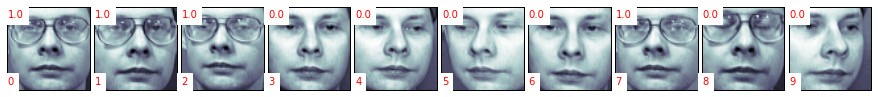

In [88]:
y_pred = svc_3.predict(X_test)
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
# Then plot with our print_faces function:
print_faces(eval_faces, y_pred, 10)

The image number 8 in the preceding figure has glasses and was classified as no
glasses. If we look at that instance, we can see that it is different from the rest of the
images with glasses (the border of the glasses cannot be seen clearly and the person
is shown with closed eyes), which could be the reason it has been misclassified.

With a few lines, we created a face classifier with a linear SVM model. Usually we
would not get such good results in the first trial. In these cases, (besides looking at
different features) we can start tweaking the hyperparameters of our algorithm. In
the particular case of SVM, we can try with different kernel functions; if linear does
not give good results, we can try with polynomial or RBF kernels. Also the C and the
gamma parameters may affect the results. For a description of the arguments and its
values, please refer to the scikit-learn documentation.